In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [3]:

file_path = r"C:\Users\ma007\OneDrive\Desktop\archive (5)\Housing.csv"

df = pd.read_csv(file_path)

In [5]:
print(df.columns.tolist())


['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


# Feature Selection

In [6]:
numeric_features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
categorical_features = ["mainroad", "furnishingstatus"]

X = df[numeric_features + categorical_features]
y = df["price"]


# Pre-Processing

In [7]:

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, ["area", "bathrooms"]),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="passthrough"  
)


# Pipeline and Model Training

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 1104974.1745035707
R²: 0.5670875819410435


# Visualization

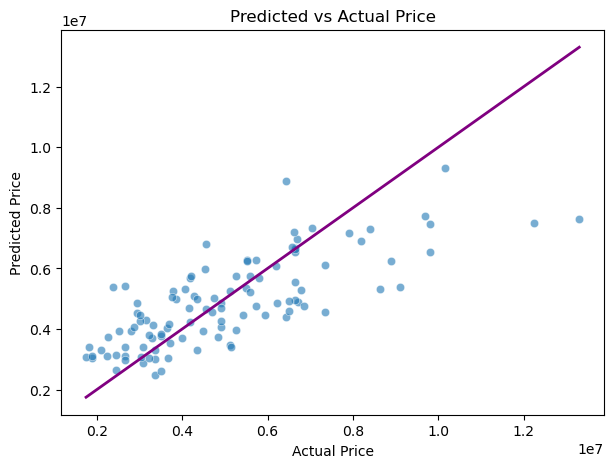

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="purple", lw=2)  
plt.show()


# Feature Importance(cofficients)

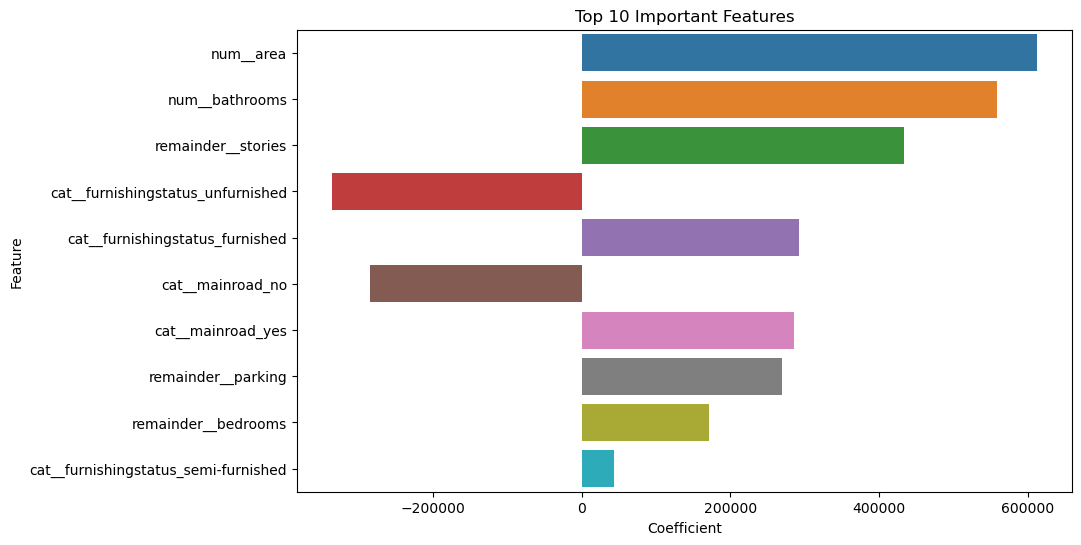

In [10]:

feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()
coefficients = pipeline.named_steps["model"].coef_

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df.head(10))
plt.title("Top 10 Important Features")
plt.show()
